In [5]:
# libraries importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pickle

In [6]:
#importing the data set 
#df for dataframe
df=pd.read_csv("dataset.csv")
df1 = pd.read_csv('Symptom-severity.csv')

In [3]:
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#basic data analysis
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Chronic cholestasis,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,malaise,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [24]:
#Data cleaaning processing
#Here we try to make up for missing points

#first the number of missing data points
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [26]:
cols = df.columns #first we get the list of columns


s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Encoding the symptoms with their severity weight


In [27]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Storing the diseases the encoded symptoms in seperate dataframes


In [29]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    labels,
                                                    shuffle=True,
                                                    train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Hyperthyroidism' 'Cervical spondylosis' 'Dimorphic hemmorhoids(piles)'
 'Acne' 'Fungal infection' 'Gastroenteritis'
 'Paralysis (brain hemorrhage)' 'Cervical spondylosis'
 'Chronic cholestasis' 'Jaundice' 'Heart attack' 'Hepatitis D'
 'Fungal infection' 'Gastroenteritis' 'Hepatitis C' 'Osteoarthristis'
 'Arthritis' 'Hyperthyroidism' 'Diabetes' 'Urinary tract infection'
 'hepatitis A' 'Urinary tract infection' 'Common Cold' 'Tuberculosis'
 'Hepatitis E' 'Tuberculosis' 'Osteoarthristis' 'Hypothyroidism'
 'Dimorphic hemmorhoids(piles)' 'Impetigo' 'Hepatitis D' 'Hyperthyroidism'
 'Drug Reaction' 'Alcoholic hepatitis' 'Impetigo' 'Hepatitis C'
 'Dimorphic hemmorhoids(piles)' 'Hepatitis C' 'Hepatitis C' 'Migraine'
 'Arthritis' 'Psoriasis' 'Heart attack' 'Diabetes' 'Varicose veins'
 'Malaria' 'Pneumonia' 'Migraine' 'Hyperthyroidism' 'Hypoglycemia'
 'Arthritis' 'Paralysis (brain hemorrhage)' 'Hypoglycemia'
 'Alcoholic hepatitis' 'GERD' 'Acne' 'Urinary tract

# Evaluating accuracy of the model


F1-score% = 92.937149290318 | Accuracy% = 92.81842818428184


<AxesSubplot:>

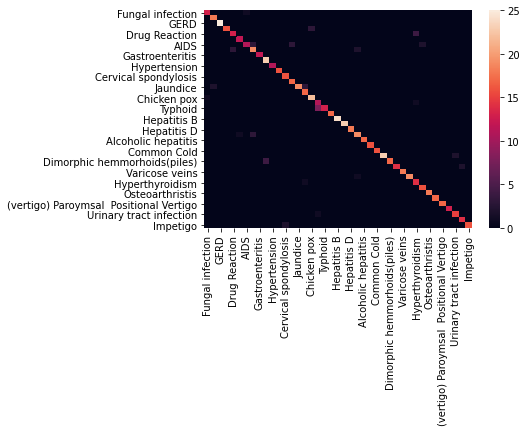

In [31]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [34]:
filename = 'disease_pred_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
loaded_model = pickle.load(open(filename, 'rb'))

In [37]:
loaded_model.fit(x_train, y_train)

pred_saved_model = loaded_model.predict(x_test)
print(pred_saved_model)

['Hyperthyroidism' 'Cervical spondylosis' 'Dimorphic hemmorhoids(piles)'
 'Acne' 'Fungal infection' 'Gastroenteritis'
 'Paralysis (brain hemorrhage)' 'Cervical spondylosis'
 'Chronic cholestasis' 'Jaundice' 'Heart attack' 'Hepatitis D'
 'Fungal infection' 'Gastroenteritis' 'Hepatitis C' 'Osteoarthristis'
 'Arthritis' 'Hyperthyroidism' 'Diabetes' 'Urinary tract infection'
 'hepatitis A' 'Urinary tract infection' 'Common Cold' 'Tuberculosis'
 'Hepatitis E' 'Tuberculosis' 'Osteoarthristis' 'Hypothyroidism'
 'Dimorphic hemmorhoids(piles)' 'Impetigo' 'Hepatitis D' 'Hyperthyroidism'
 'Drug Reaction' 'Alcoholic hepatitis' 'Impetigo' 'Hepatitis C'
 'Dimorphic hemmorhoids(piles)' 'Hepatitis C' 'Hepatitis C' 'Migraine'
 'Arthritis' 'Psoriasis' 'Heart attack' 'Diabetes' 'Varicose veins'
 'Malaria' 'Pneumonia' 'Migraine' 'Hyperthyroidism' 'Hypoglycemia'
 'Arthritis' 'Paralysis (brain hemorrhage)' 'Hypoglycemia'
 'Alcoholic hepatitis' 'GERD' 'Acne' 'Urinary tract infection'
 'Hepatitis D' 'Acne' 'A

F1-score% = 92.937149290318 | Accuracy% = 92.81842818428184


<AxesSubplot:>

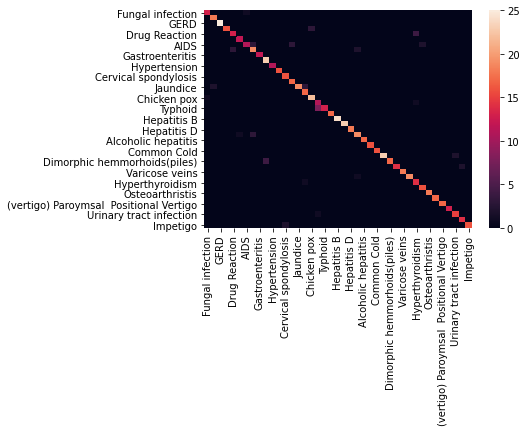

In [38]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, pred_saved_model, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred_saved_model)*100)
sns.heatmap(df_cm)